In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
%matplotlib inline
warnings.filterwarnings("ignore")

In [2]:
data = pd.read_csv("crime_data.csv")
data

,Unnamed: 0,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6
5,Colorado,7.9,204,78,38.7
6,Connecticut,3.3,110,77,11.1
7,Delaware,5.9,238,72,15.8
8,Florida,15.4,335,80,31.9
9,Georgia,17.4,211,60,25.8


## Data Preprocsessing

In [3]:
data.shape

(50, 5)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  50 non-null     object 
 1   Murder      50 non-null     float64
 2   Assault     50 non-null     int64  
 3   UrbanPop    50 non-null     int64  
 4   Rape        50 non-null     float64
dtypes: float64(2), int64(2), object(1)
memory usage: 2.1+ KB


In [5]:
data.describe()

,Murder,Assault,UrbanPop,Rape
count,50.00000,50.000000,50.000000,50.000000
mean,7.78800,170.760000,65.540000,21.232000
std,4.35551,83.337661,14.474763,9.366385
min,0.80000,45.000000,32.000000,7.300000
25%,4.07500,109.000000,54.500000,15.075000
50%,7.25000,159.000000,66.000000,20.100000
75%,11.25000,249.000000,77.750000,26.175000
max,17.40000,337.000000,91.000000,46.000000


In [6]:
data.agg(["var","median","skew","kurtosis"])

,Murder,Assault,UrbanPop,Rape
var,18.970465,6945.165714,209.518776,87.729159
median,7.250000,159.000000,66.000000,20.100000
skew,0.393956,0.234410,-0.226009,0.801200
kurtosis,-0.827488,-1.053848,-0.738360,0.353964


In [7]:
data.isna().sum()

Unnamed: 0    0
Murder        0
Assault       0
UrbanPop      0
Rape          0
dtype: int64

In [8]:
#renaming column
data.rename({"Unnamed: 0":"State"},axis =1,inplace = True)

## EDA

In [9]:
sns.set_style(style = "darkgrid")

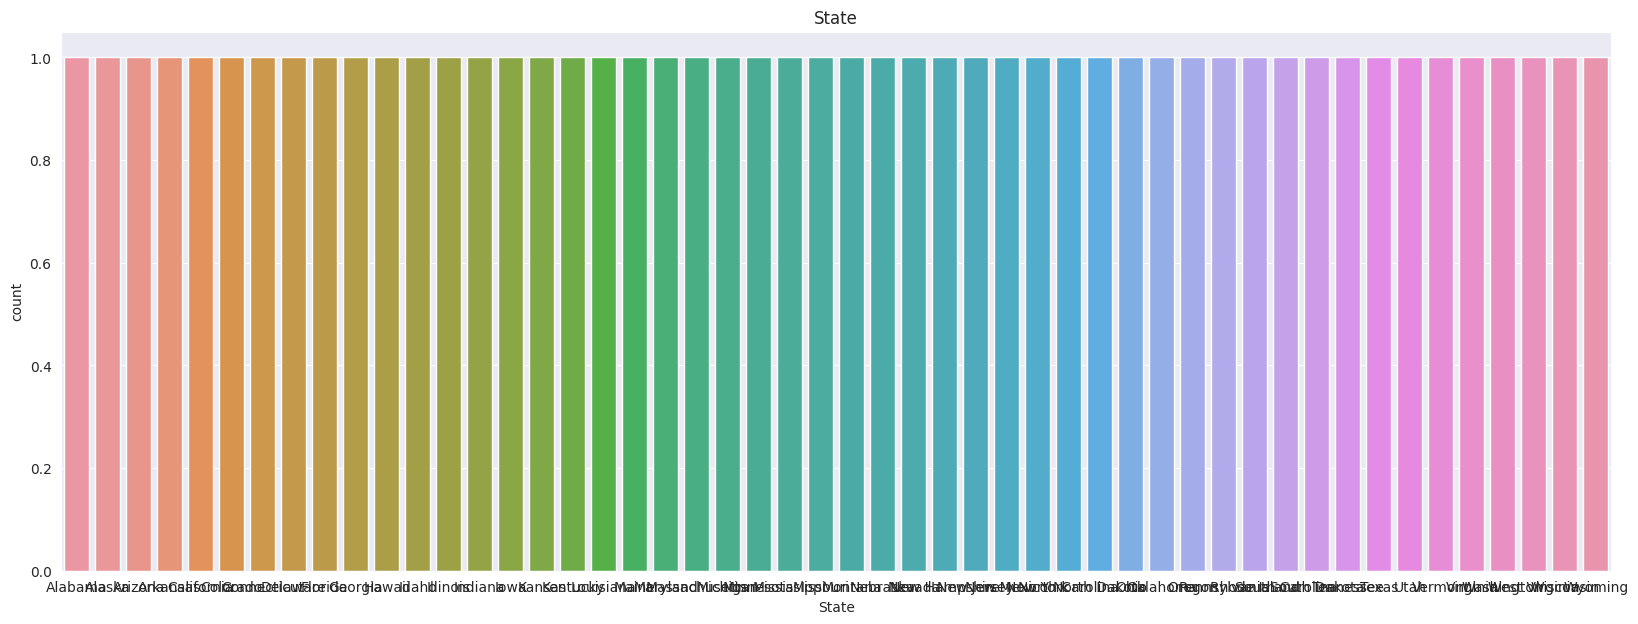

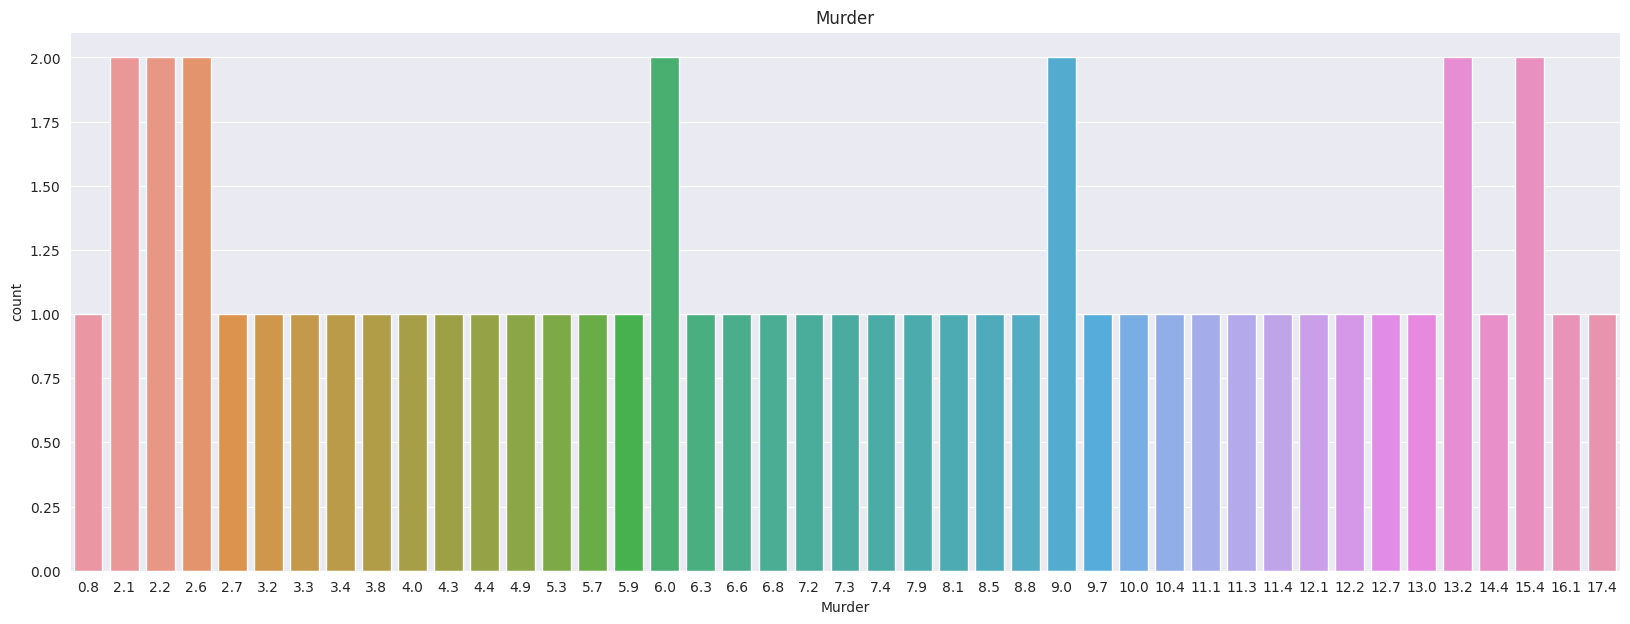

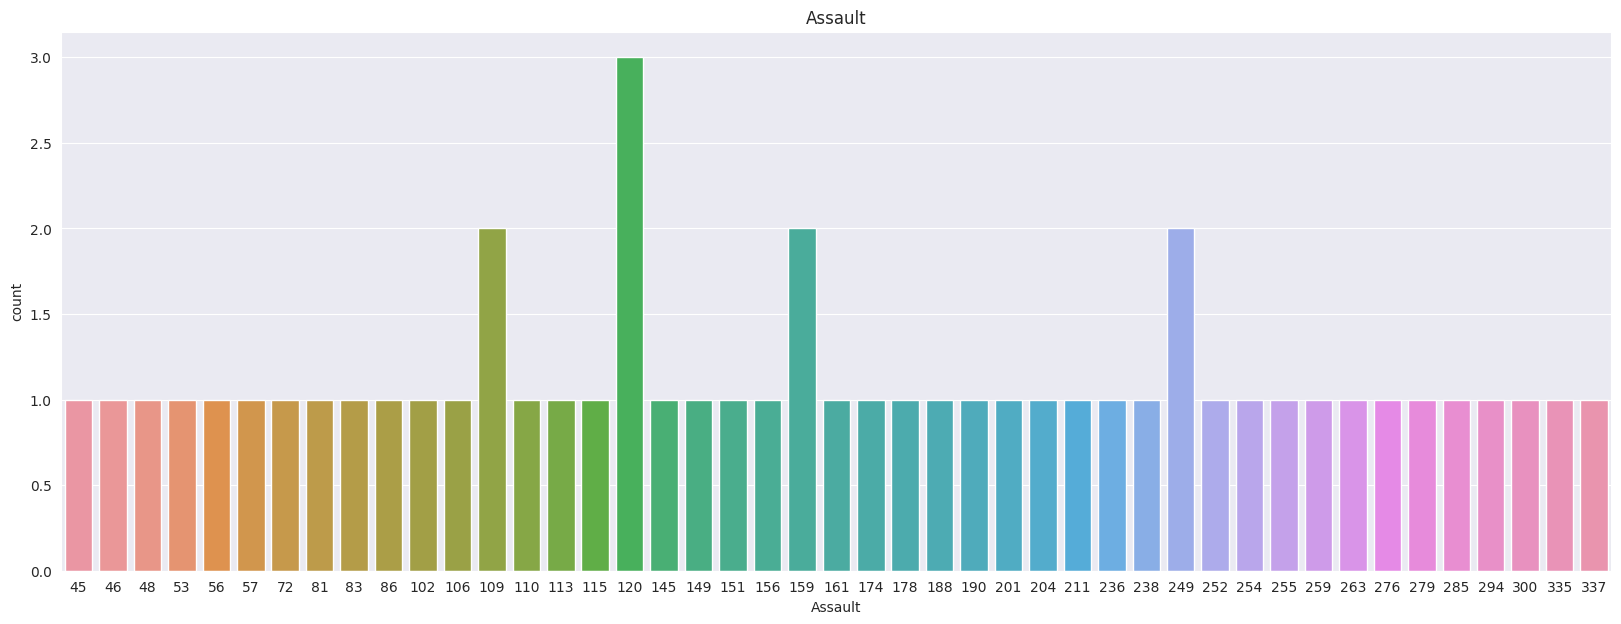

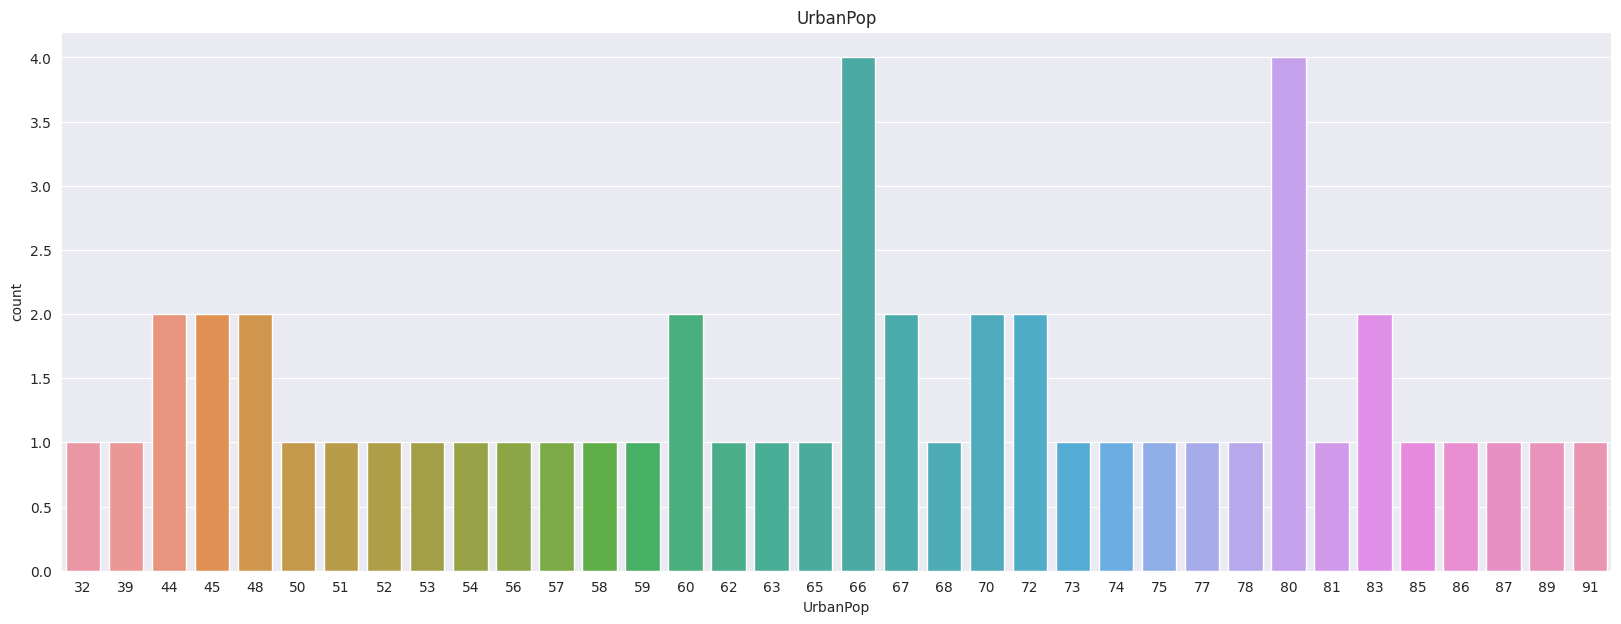

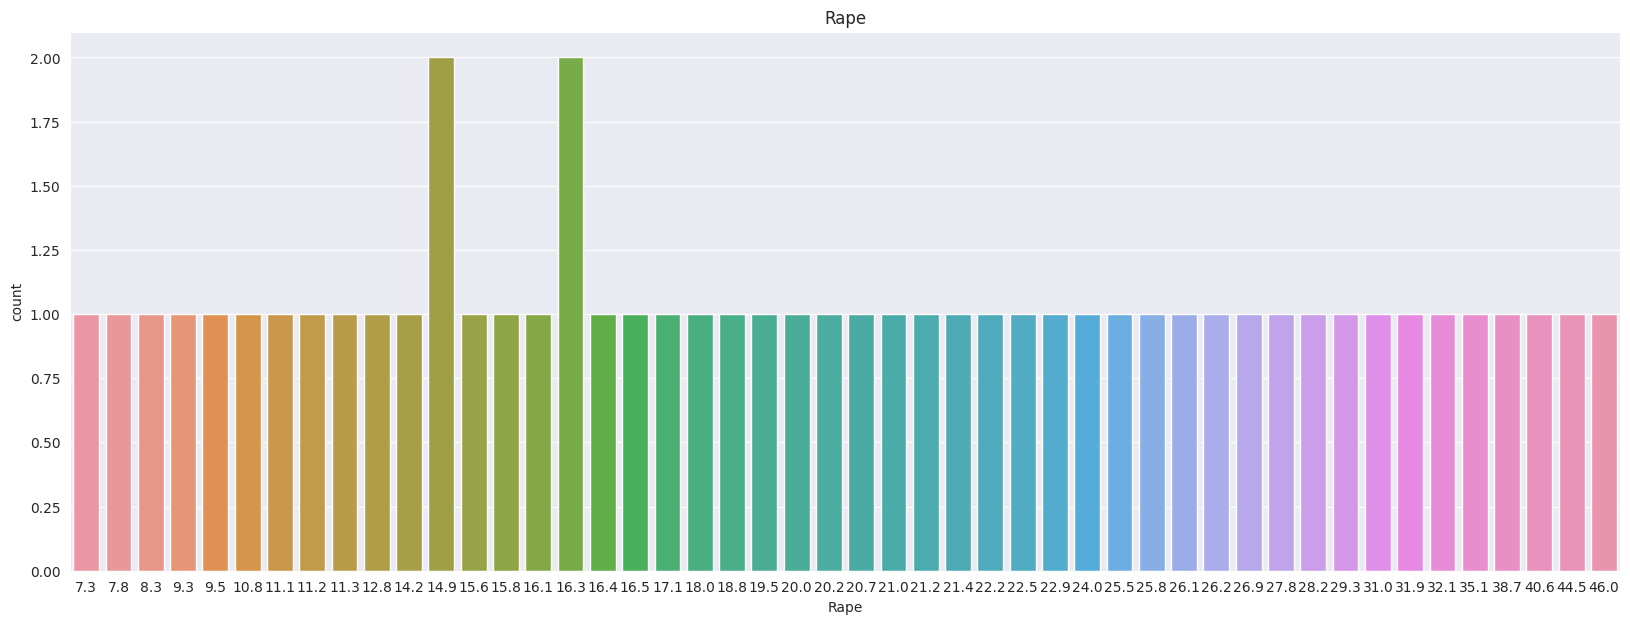

In [10]:
for i in data:
    plt.figure(figsize=(20,7))
    sns.countplot(data[i])
    plt.title(i)
    plt.show()

#### visualizing each feature with respect to state column

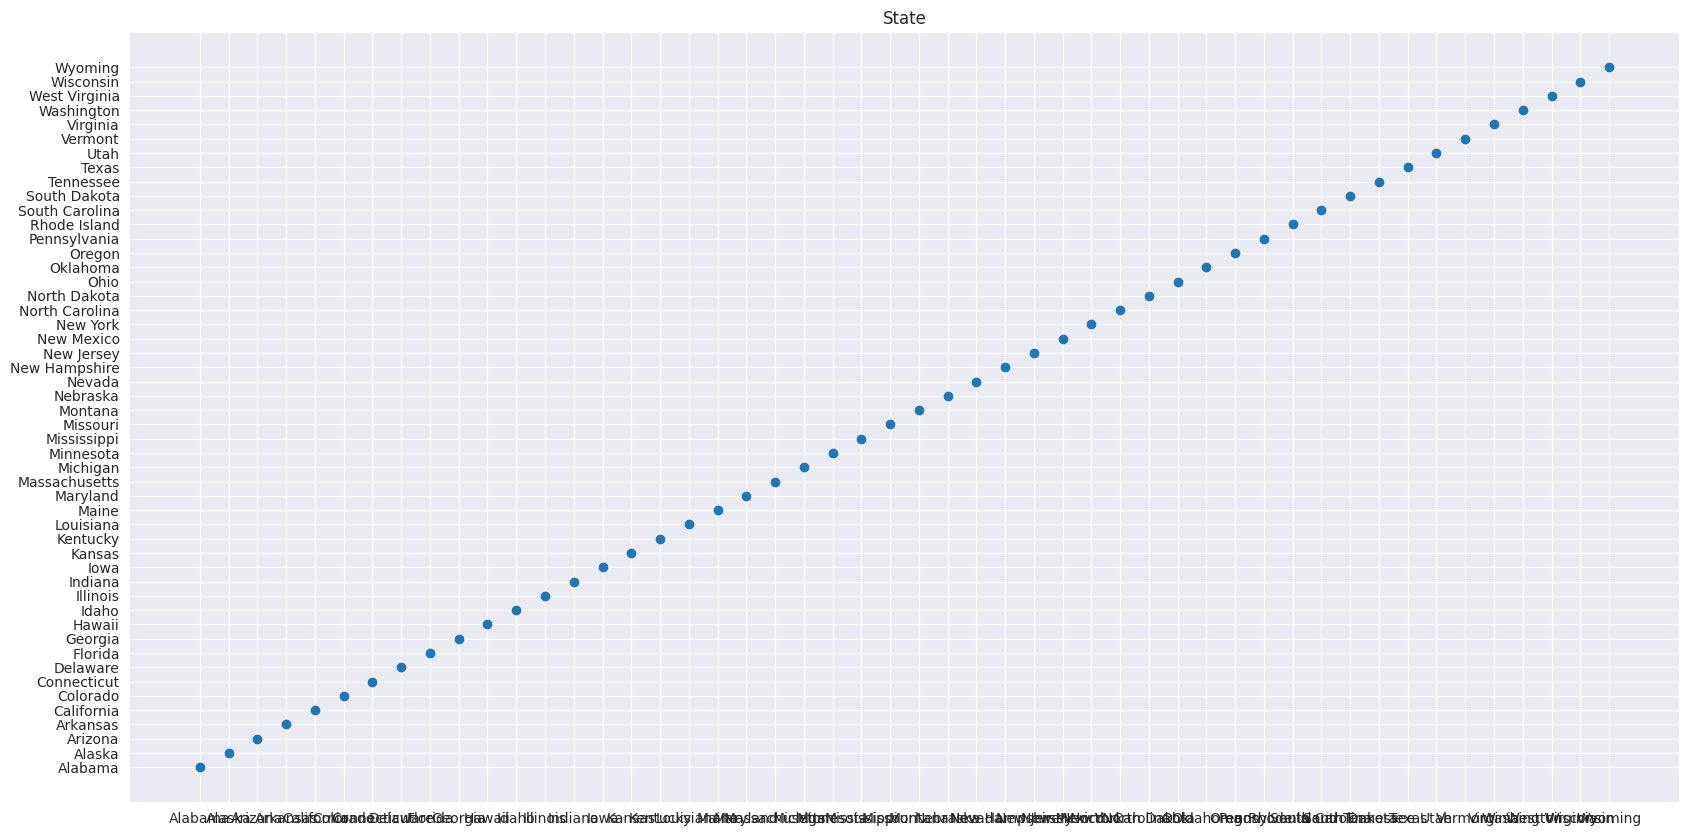

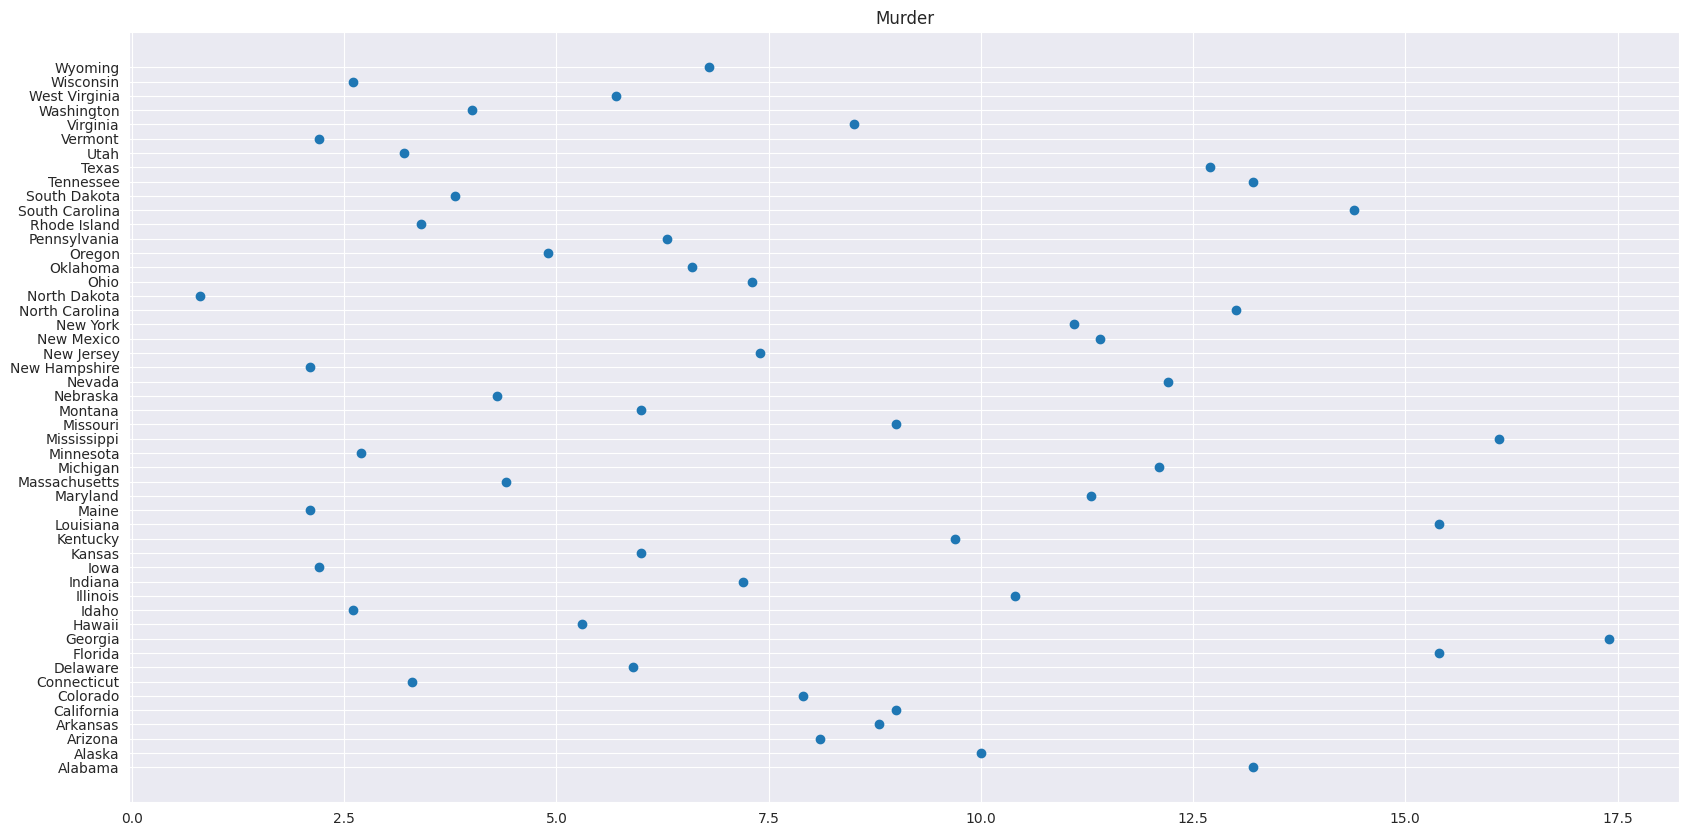

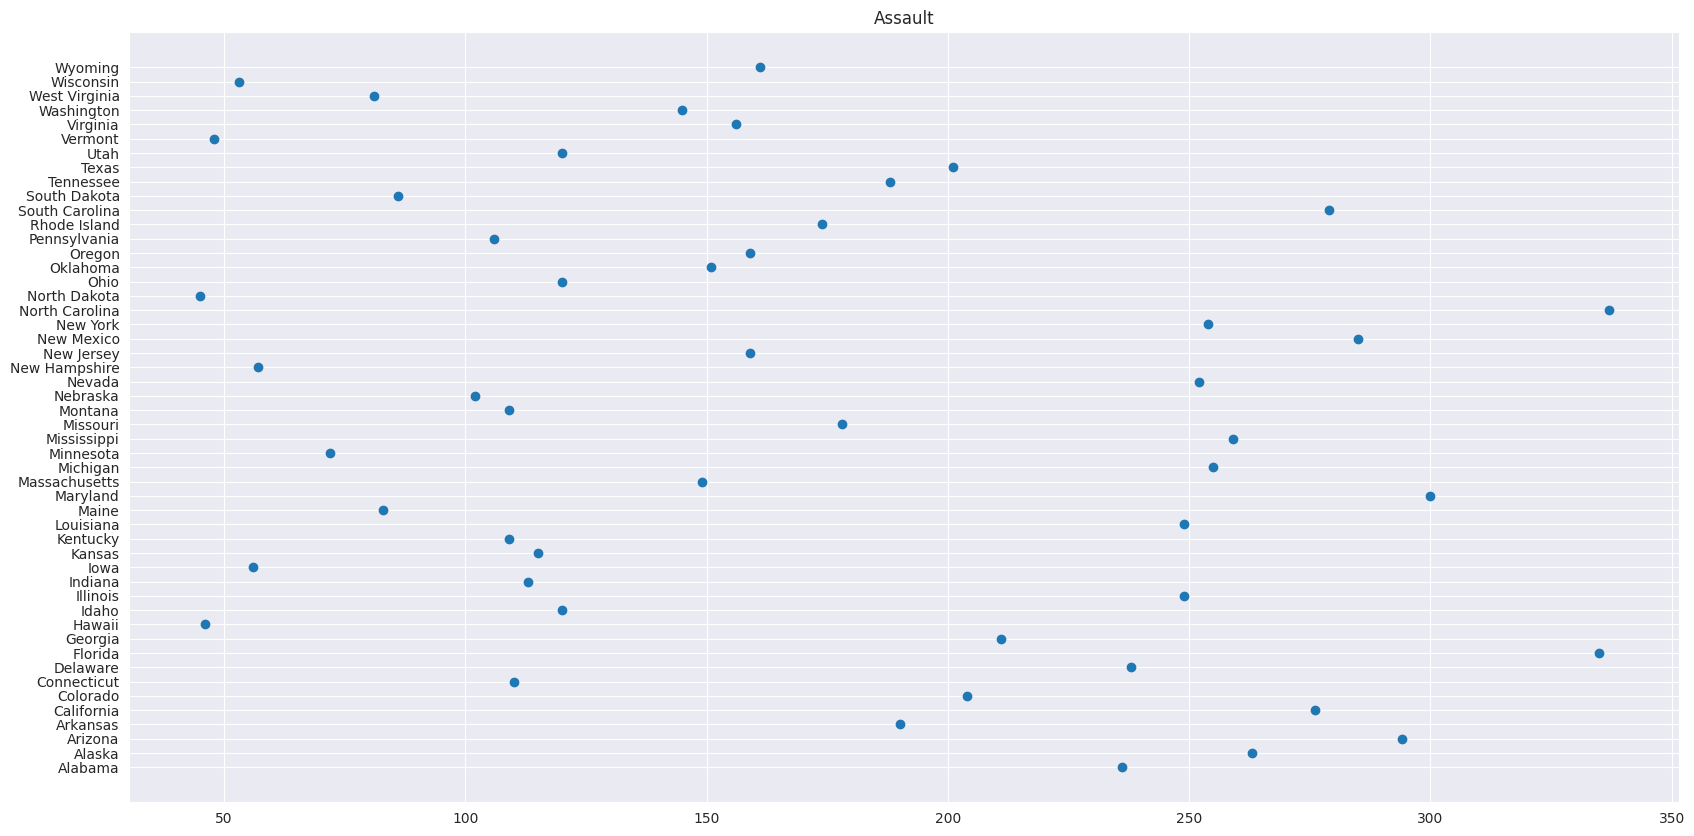

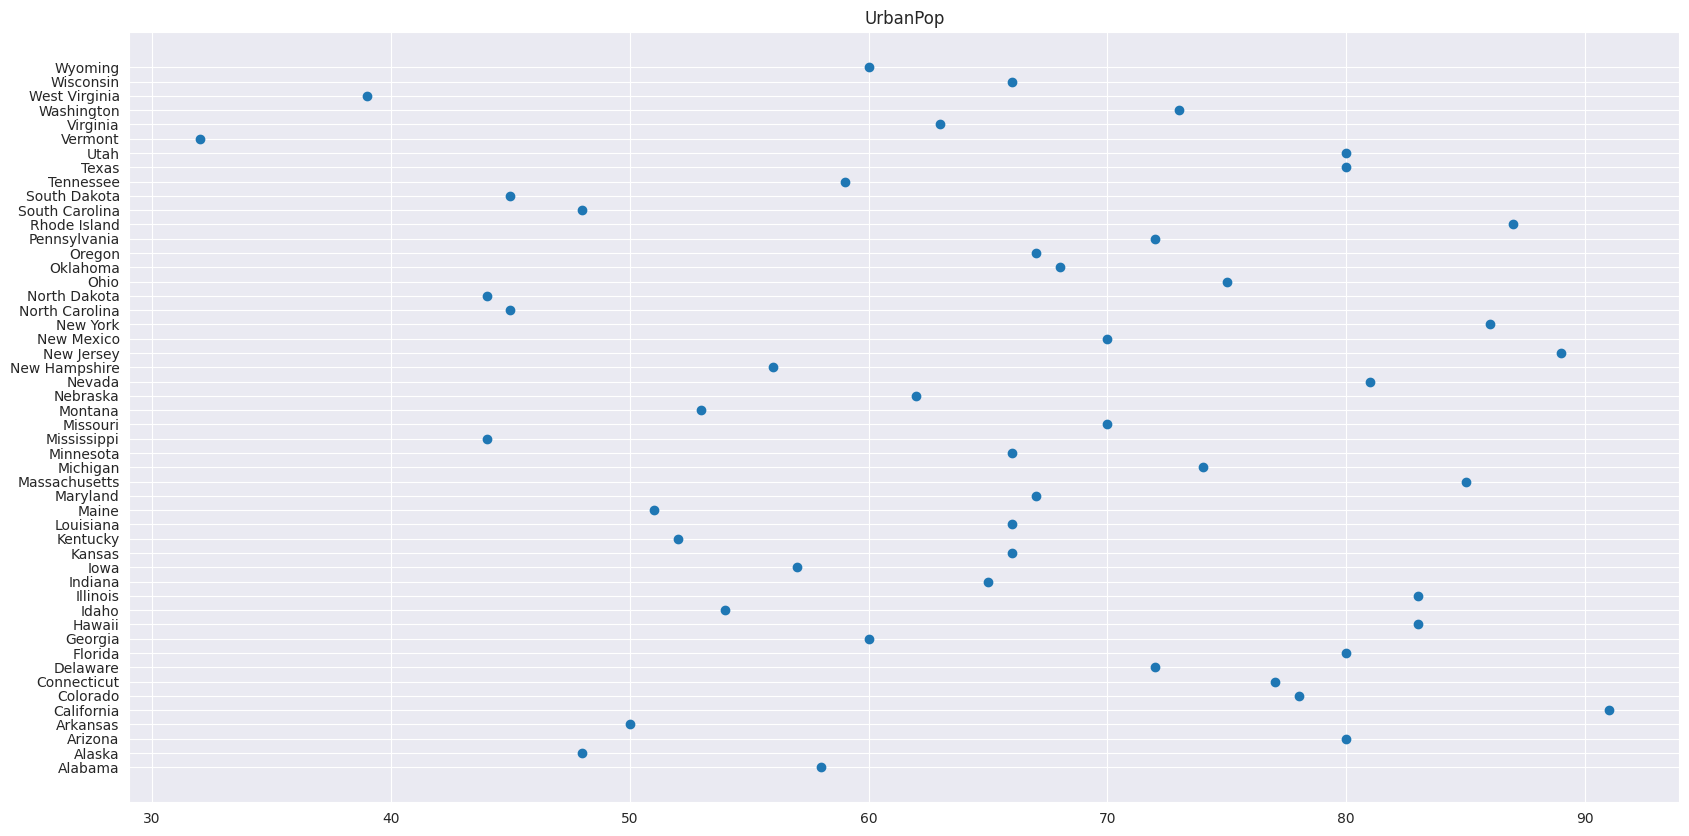

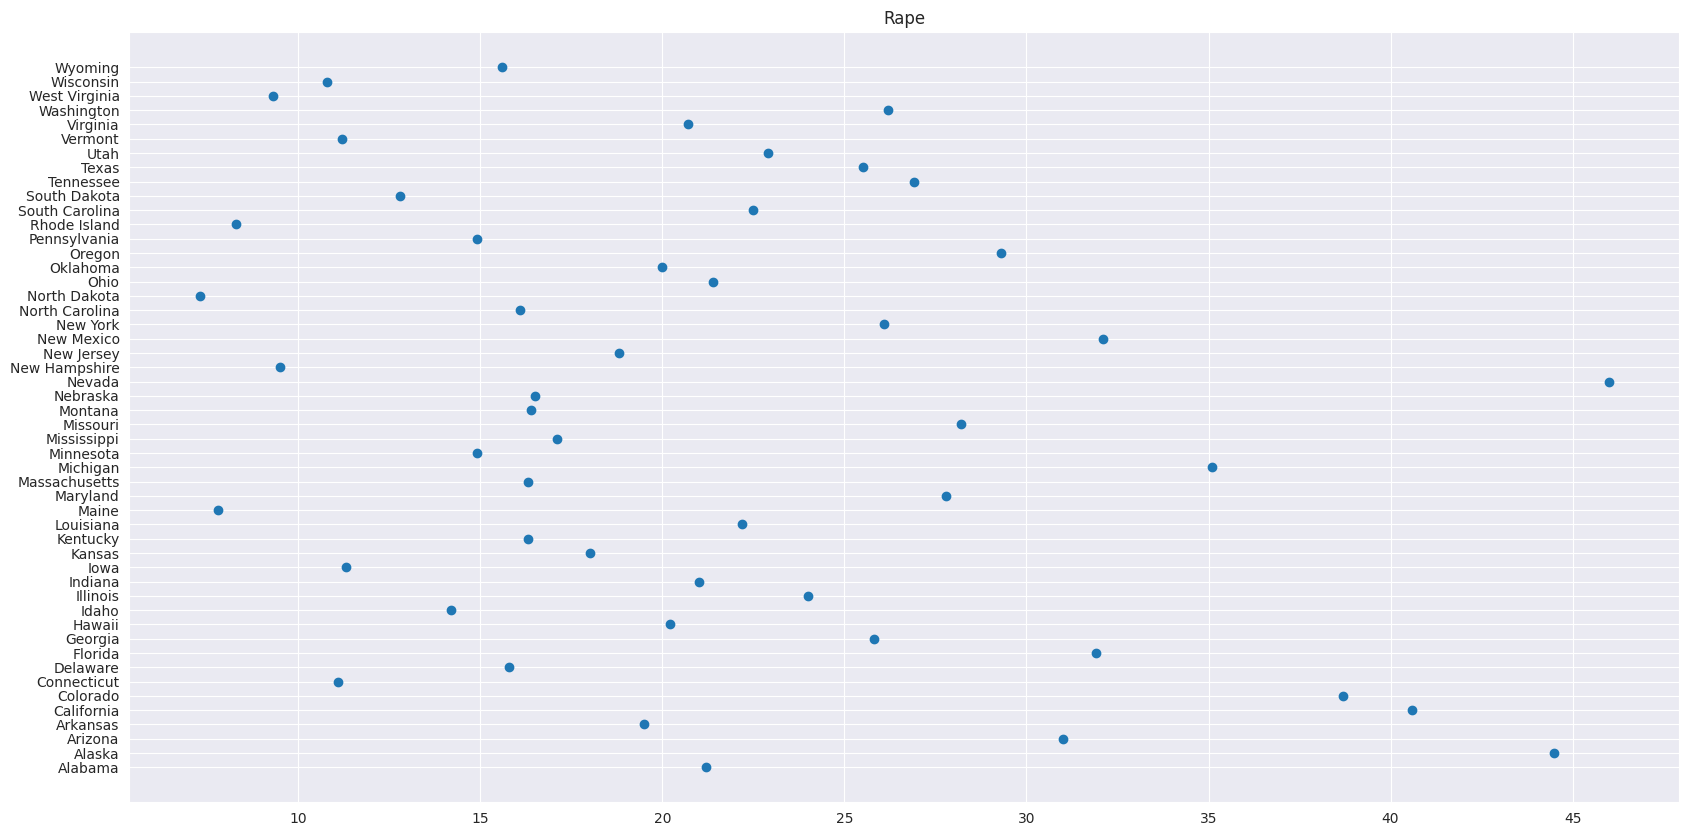

In [11]:
for i in data:
    plt.figure(figsize=(20,10))
    plt.scatter(x = data[i], y= "State", data = data)
    plt.title(i)
    plt.show()

### Histogram

<AxesSubplot:ylabel='Frequency'>

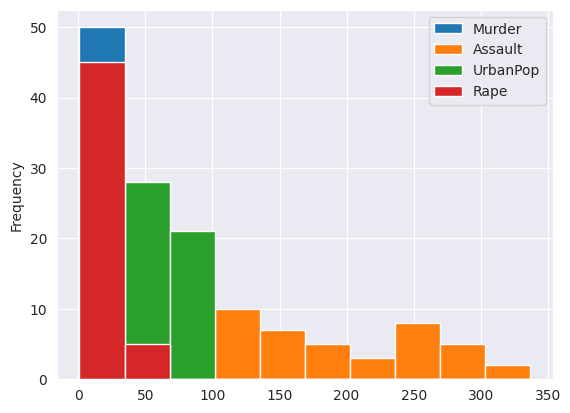

In [12]:
data.plot.hist()

## Normalizing the data

In [13]:
#normalization function
def norm_func(i):
    x = (i-i.min())/(i.max()-i.min())
    return x

In [14]:
#normalizing dataframe
df_norm = norm_func(data.iloc[:,1:])
df_norm

,Murder,Assault,UrbanPop,Rape
0,0.746988,0.654110,0.440678,0.359173
1,0.554217,0.746575,0.271186,0.961240
2,0.439759,0.852740,0.813559,0.612403
3,0.481928,0.496575,0.305085,0.315245
4,0.493976,0.791096,1.000000,0.860465
5,0.427711,0.544521,0.779661,0.811370
6,0.150602,0.222603,0.762712,0.098191
7,0.307229,0.660959,0.677966,0.219638
8,0.879518,0.993151,0.813559,0.635659
9,1.000000,0.568493,0.474576,0.478036


# Clustering Models

## Hierarchical Clustering

In [15]:
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering

### Creating Dendograms

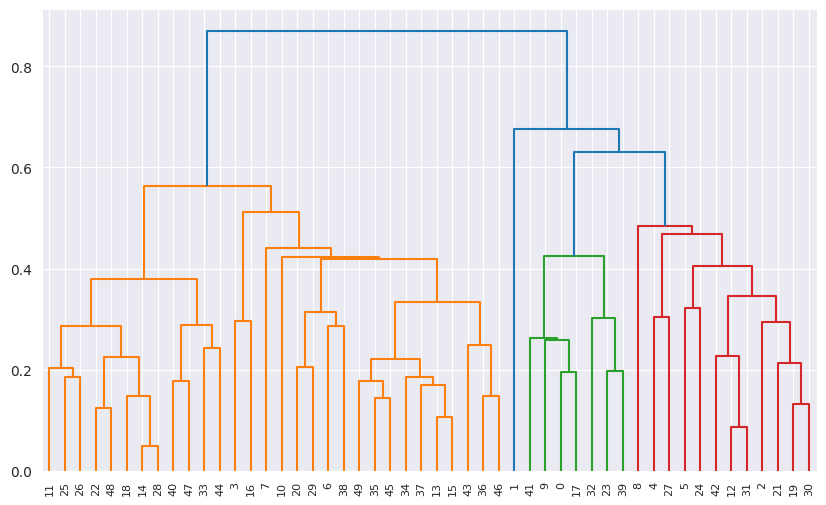

In [16]:
plt.figure(figsize= (10,6))
dendrogram = sch.dendrogram(sch.linkage(df_norm,method = "average"))
plt.show()

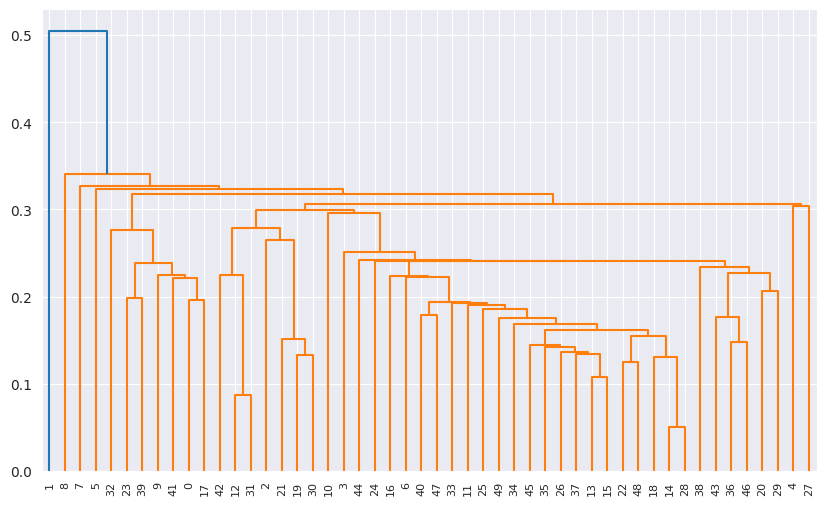

In [17]:
plt.figure(figsize= (10,6))
dendrogram = sch.dendrogram(sch.linkage(df_norm,method = "single"))
plt.show()

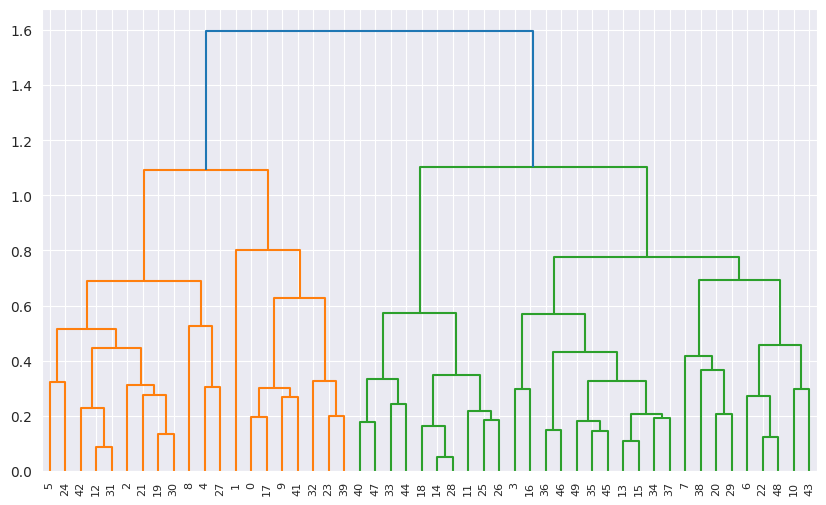

In [18]:
plt.figure(figsize= (10,6))
dendrogram = sch.dendrogram(sch.linkage(df_norm,method = "complete"))
plt.show()

### Buliding Agglomerative Clustering Model

In [19]:
#create clusters
avg_cluster = AgglomerativeClustering(n_clusters = 5,affinity="euclidean",linkage="average")

In [20]:
single_cluster= AgglomerativeClustering(n_clusters = 5,affinity="euclidean",linkage="single")

In [21]:
complete_cluster = AgglomerativeClustering(n_clusters = 5,affinity="euclidean",linkage="complete")

In [22]:
#save clusters for chart
avg_c = avg_cluster.fit_predict(df_norm)
single_c = single_cluster.fit_predict(df_norm)
complete_c = complete_cluster.fit_predict(df_norm)

In [23]:
df_norm['average'] = avg_c
df_norm['single'] = single_c
df_norm['complete'] = complete_c

In [24]:
df_norm

,Murder,Assault,UrbanPop,Rape,average,single,complete
0,0.746988,0.654110,0.440678,0.359173,3,0,3
1,0.554217,0.746575,0.271186,0.961240,2,3,4
2,0.439759,0.852740,0.813559,0.612403,1,0,1
3,0.481928,0.496575,0.305085,0.315245,0,0,0
4,0.493976,0.791096,1.000000,0.860465,1,0,1
5,0.427711,0.544521,0.779661,0.811370,1,4,1
6,0.150602,0.222603,0.762712,0.098191,0,0,0
7,0.307229,0.660959,0.677966,0.219638,0,1,0
8,0.879518,0.993151,0.813559,0.635659,1,2,1
9,1.000000,0.568493,0.474576,0.478036,3,0,3


### Evaluation and Performance

In [25]:
from sklearn import metrics
avg = metrics.silhouette_score(df_norm,avg_c,metric = "euclidean")
single = metrics.silhouette_score(df_norm,single_c,metric = "euclidean")
complete = metrics.silhouette_score(df_norm,complete_c,metric = "euclidean")

In [26]:
silhoute_score = pd.DataFrame({"name":['average','single','complete'],"score":[avg,single,complete]})
silhoute_score

,name,score
0,average,0.629115
1,single,-0.113486
2,complete,0.565375


####  Before Hierarchical clustering

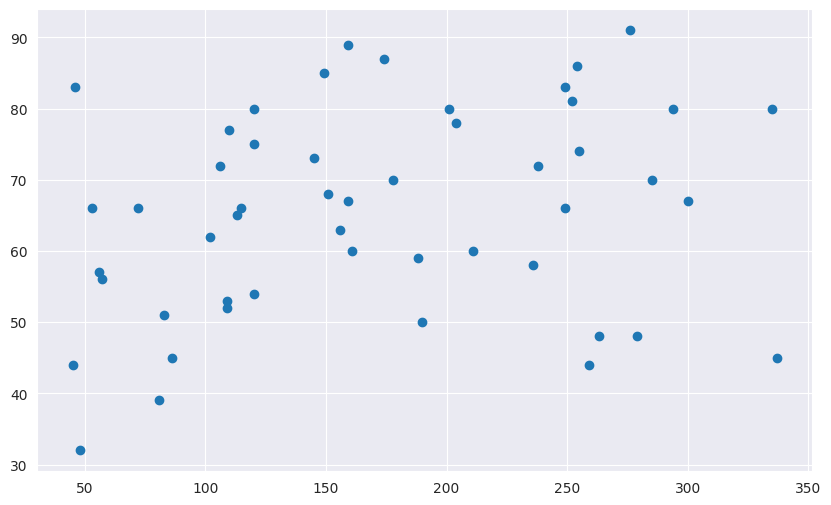

In [27]:
plt.figure(figsize= (10,6))
plt.scatter(data["Assault"],data["UrbanPop"])
plt.show()

#### After Hierarchical Clustering

#### average

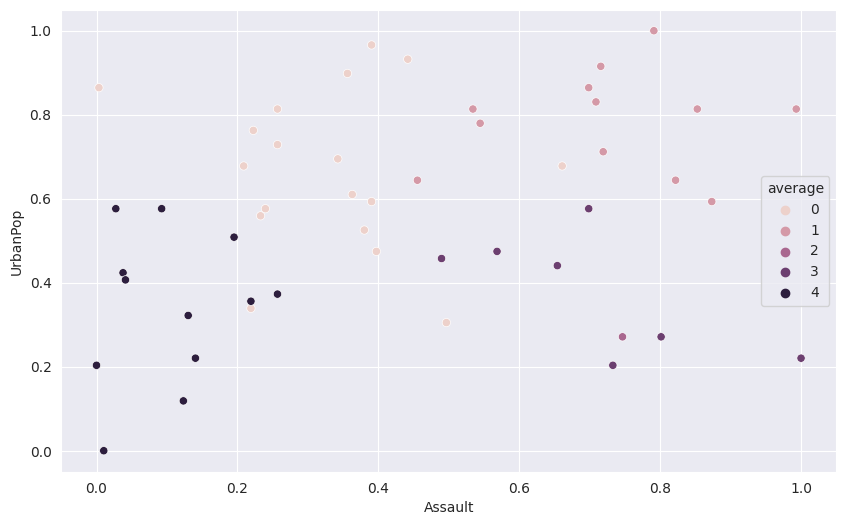

In [28]:
plt.figure(figsize= (10,6))
sns.scatterplot(x = "Assault", y = "UrbanPop", hue ="average", data =df_norm)
plt.show()

#### single

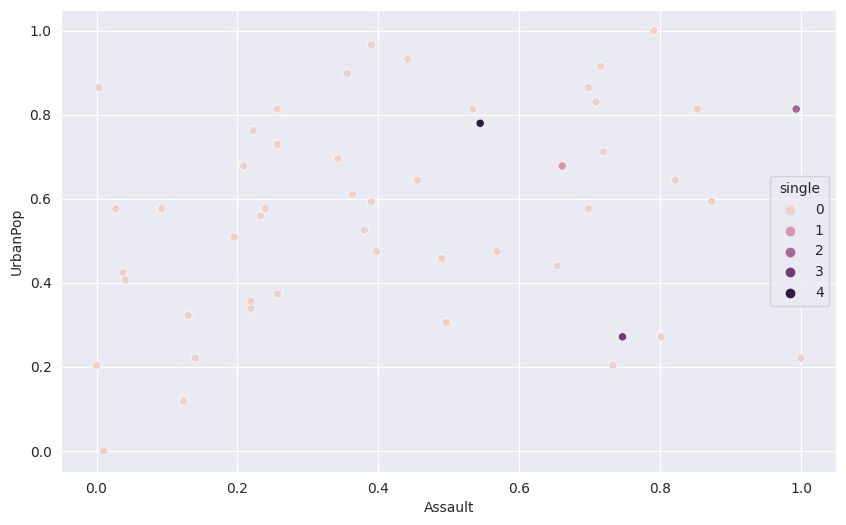

In [29]:
plt.figure(figsize= (10,6))
sns.scatterplot(x = "Assault", y = "UrbanPop", hue ="single", data =df_norm)
plt.show()

#### complete

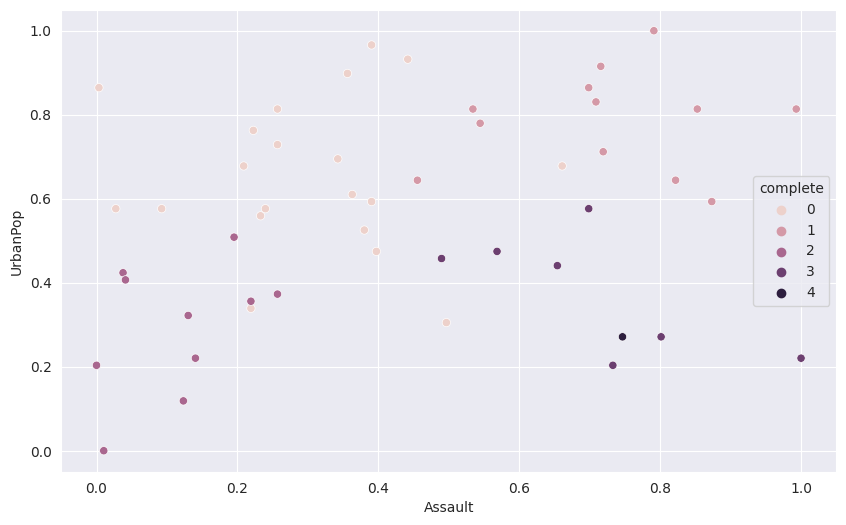

In [30]:
plt.figure(figsize= (10,6))
sns.scatterplot(x = "Assault", y = "UrbanPop", hue ="complete", data =df_norm)
plt.show()

## DBScan Clustering

In [31]:
from sklearn.preprocessing import StandardScaler
scaler_stand = StandardScaler()

In [32]:
scaled_data_df = scaler_stand.fit_transform(data.iloc[:,1:])

In [33]:
from sklearn.cluster import DBSCAN

In [34]:
dbscan = DBSCAN(eps=1,min_samples = 7)
dbscan.fit(scaled_data_df)

DBSCAN(eps=1, min_samples=7)

In [35]:
dbscan.labels_

array([-1, -1, -1, -1, -1, -1,  0, -1, -1, -1, -1,  0, -1,  0,  0,  0,  0,
       -1,  0, -1, -1, -1,  0, -1,  0,  0,  0, -1,  0, -1, -1, -1, -1,  0,
        0,  0, -1,  0, -1, -1,  0, -1, -1, -1, -1,  0,  0,  0,  0,  0])

## K-Means Clustering 

In [36]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters = 4, random_state = 10)
kmeans.fit(scaled_data_df)

KMeans(n_clusters=4, random_state=10)

In [37]:
kmeans.cluster_centers_

array([[ 1.42622412,  0.88321132, -0.82279055,  0.01946669],
       [ 0.70212683,  1.04999438,  0.72997363,  1.28990383],
       [-0.49440658, -0.3864845 ,  0.58167593, -0.26431024],
       [-0.97130281, -1.11783581, -0.93954982, -0.97657842]])

In [38]:
kmeans.labels_

array([0, 1, 1, 0, 1, 1, 2, 2, 1, 0, 2, 3, 1, 2, 3, 2, 3, 0, 3, 1, 2, 1,
       3, 0, 1, 3, 3, 1, 3, 2, 1, 1, 0, 3, 2, 2, 2, 2, 2, 0, 3, 0, 1, 2,
       3, 2, 2, 3, 3, 2], dtype=int32)

In [39]:
kmeans.inertia_

57.55425863091105

## Select the number of clusters

cluster size: 2 wcss: 104.96163315756873
cluster size: 3 wcss: 80.08886132199619
cluster size: 4 wcss: 57.55425863091104
cluster size: 5 wcss: 50.52026552535069
cluster size: 6 wcss: 43.92746404497573
cluster size: 7 wcss: 40.52183461131976
cluster size: 8 wcss: 34.6873883978491
cluster size: 9 wcss: 32.70648136388184


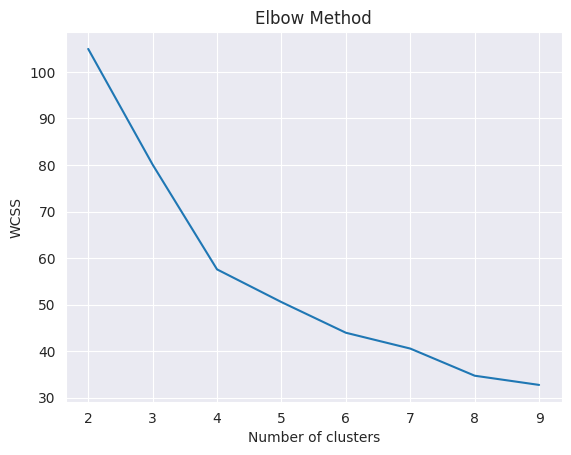

In [40]:
wcss = []
for i in range(2,10):
    kmeans = KMeans(n_clusters=i,random_state=0)
    kmeans.fit(scaled_data_df)
    wcss.append(kmeans.inertia_)
    print("cluster size:",i,"wcss:",kmeans.inertia_)
    
plt.plot(range(2,10),wcss)
plt.title("Elbow Method")
plt.xlabel("Number of clusters")
plt.ylabel("WCSS")
plt.show()

#### sillouette_score 

In [41]:
metrics.silhouette_score(scaled_data_df,kmeans.labels_,metric= "euclidean")

0.2518939934580804

In [42]:
Sil_score = []
for i in range(2,10):
    kmeans = KMeans(n_clusters = i, random_state = 0)
    kmeans.fit(scaled_data_df)
    score = metrics.silhouette_score(scaled_data_df,kmeans.labels_,metric= "euclidean")
    Sil_score.append(score)
    print("cluster size:",i,"WCSS:",score)

cluster size: 2 WCSS: 0.4084890326217641
cluster size: 3 WCSS: 0.3095091512791688
cluster size: 4 WCSS: 0.33968891433344395
cluster size: 5 WCSS: 0.30612803169146263
cluster size: 6 WCSS: 0.29910456843899946
cluster size: 7 WCSS: 0.23035904501364113
cluster size: 8 WCSS: 0.2732934287338534
cluster size: 9 WCSS: 0.2518939934580804


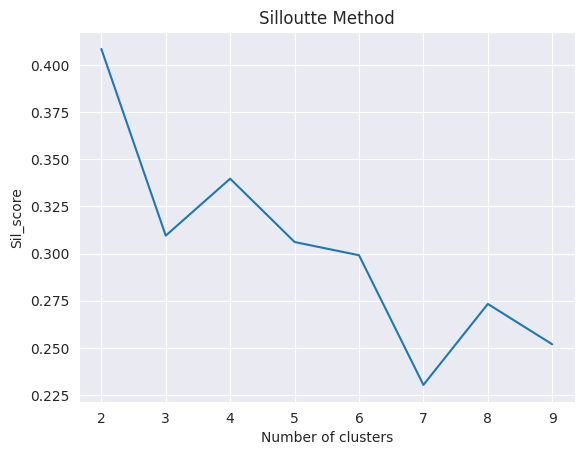

In [43]:
plt.plot(range(2,10),Sil_score)
plt.title("Silloutte Method")
plt.xlabel("Number of clusters")
plt.ylabel("Sil_score")
plt.show()

In [44]:
#build cluster algorithm
clusters_new = KMeans(4,random_state = 42)
clusters_new.fit(scaled_data_df)

KMeans(n_clusters=4, random_state=42)

In [45]:
clusters_new.labels_

array([1, 2, 2, 1, 2, 2, 0, 0, 2, 1, 0, 3, 2, 0, 3, 0, 3, 1, 3, 2, 0, 2,
       3, 1, 2, 3, 3, 2, 3, 0, 2, 2, 1, 3, 0, 0, 0, 0, 0, 1, 3, 1, 2, 0,
       3, 0, 0, 3, 3, 0], dtype=int32)

In [46]:
clusters_new.n_iter_

5

# adding outputs in main DataFrame to compare all clusters

In [47]:
data["Algometrive_avg_clusters"] = avg_c
data["Algometrive_single_clusters"] = single_c
data["Algometrive_complete_clusters"] = complete_c
data["Dbscan_clusters"] = dbscan.labels_
data["Kmeans_clusters"] = clusters_new.labels_

In [48]:
data

,State,Murder,Assault,UrbanPop,Rape,Algometrive_avg_clusters,Algometrive_single_clusters,Algometrive_complete_clusters,Dbscan_clusters,Kmeans_clusters
0,Alabama,13.2,236,58,21.2,3,0,3,-1,1
1,Alaska,10.0,263,48,44.5,2,3,4,-1,2
2,Arizona,8.1,294,80,31.0,1,0,1,-1,2
3,Arkansas,8.8,190,50,19.5,0,0,0,-1,1
4,California,9.0,276,91,40.6,1,0,1,-1,2
5,Colorado,7.9,204,78,38.7,1,4,1,-1,2
6,Connecticut,3.3,110,77,11.1,0,0,0,0,0
7,Delaware,5.9,238,72,15.8,0,1,0,-1,0
8,Florida,15.4,335,80,31.9,1,2,1,-1,2
9,Georgia,17.4,211,60,25.8,3,0,3,-1,1
